In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-05-04 23:53:02.196929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='APPLE'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end,interval = '1h')
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-04 09:30:00-04:00,164.889999,165.770004,164.309998,165.250000,165.250000,16477924,APPLE
2023-05-04 10:30:00-04:00,165.255005,166.880005,165.130295,165.934998,165.934998,9036370,APPLE
2023-05-04 11:30:00-04:00,165.940002,166.229996,165.429993,166.210007,166.210007,5049232,APPLE
2023-05-04 12:30:00-04:00,166.210007,167.039993,165.949997,166.672607,166.672607,5244652,APPLE
2023-05-04 13:30:00-04:00,166.675003,166.904999,165.510101,165.532806,165.532806,5400963,APPLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-04 09:30:00-04:00,164.889999,165.770004,164.309998,165.250000,165.250000,16477924,APPLE
1,2023-05-04 10:30:00-04:00,165.255005,166.880005,165.130295,165.934998,165.934998,9036370,APPLE
2,2023-05-04 11:30:00-04:00,165.940002,166.229996,165.429993,166.210007,166.210007,5049232,APPLE
3,2023-05-04 12:30:00-04:00,166.210007,167.039993,165.949997,166.672607,166.672607,5244652,APPLE
4,2023-05-04 13:30:00-04:00,166.675003,166.904999,165.510101,165.532806,165.532806,5400963,APPLE
...,...,...,...,...,...,...,...,...
17555,2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
17556,2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
17557,2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC
17558,2024-05-03 14:30:00-04:00,164.300003,164.589996,164.110001,164.220001,164.220001,464263,GENERAL_ELC


In [11]:
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-04 09:30:00-04:00,106.160004,106.300003,104.849998,104.860001,104.860001,4168075,GOOGLE
2023-05-04 10:30:00-04:00,104.864998,105.730003,104.699997,105.669998,105.669998,2489736,GOOGLE
2023-05-04 11:30:00-04:00,105.669998,105.739998,105.160004,105.549004,105.549004,2073080,GOOGLE
2023-05-04 12:30:00-04:00,105.550003,106.199997,105.400002,106.002998,106.002998,1988807,GOOGLE
2023-05-04 13:30:00-04:00,106.010002,106.059998,105.550003,105.669998,105.669998,1780439,GOOGLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2023-05-04 09:30:00-04:00,104.860001
2023-05-04 10:30:00-04:00,105.669998
2023-05-04 11:30:00-04:00,105.549004
2023-05-04 12:30:00-04:00,106.002998
2023-05-04 13:30:00-04:00,105.669998
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

15014

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.71376203],
       [-0.71115079],
       [-0.71154085],
       ...,
       [-0.52214152],
       [-0.52239942],
       [-0.52275404]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape[1]

60

In [21]:
y_train.shape[0]

14954

In [22]:
x_train.shape

(14954, 60, 1)

In [23]:
x_train

array([[[-0.71376203],
        [-0.71115079],
        [-0.71154085],
        ...,
        [-0.66431433],
        [-0.66495425],
        [-0.66350357]],

       [[-0.71115079],
        [-0.71154085],
        [-0.71007728],
        ...,
        [-0.66495425],
        [-0.66350357],
        [-0.6631006 ]],

       [[-0.71154085],
        [-0.71007728],
        [-0.71115079],
        ...,
        [-0.66350357],
        [-0.6631006 ],
        [-0.66318117]],

       ...,

       [[-0.76413707],
        [-0.76377687],
        [-0.76408562],
        ...,
        [-0.74306556],
        [-0.7431942 ],
        [-0.74314274]],

       [[-0.76377687],
        [-0.76408562],
        [-0.76112687],
        ...,
        [-0.7431942 ],
        [-0.74314274],
        [-0.74391459]],

       [[-0.76408562],
        [-0.76112687],
        [-0.75980185],
        ...,
        [-0.74314274],
        [-0.74391459],
        [-0.74327138]]])

In [24]:
com

'APPLE'

In [25]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-04 09:30:00-04:00,164.889999,165.770004,164.309998,165.250000,165.250000,16477924,APPLE
2023-05-04 10:30:00-04:00,165.255005,166.880005,165.130295,165.934998,165.934998,9036370,APPLE
2023-05-04 11:30:00-04:00,165.940002,166.229996,165.429993,166.210007,166.210007,5049232,APPLE
2023-05-04 12:30:00-04:00,166.210007,167.039993,165.949997,166.672607,166.672607,5244652,APPLE
2023-05-04 13:30:00-04:00,166.675003,166.904999,165.510101,165.532806,165.532806,5400963,APPLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,184.660004,184.940002,184.130005,184.360001,184.360001,10376113,APPLE
2024-05-03 12:30:00-04:00,184.359894,185.494995,184.300003,185.360107,185.360107,12652093,APPLE
2024-05-03 13:30:00-04:00,185.360001,185.860001,184.809998,185.750000,185.750000,12223485,APPLE


In [26]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [27]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [28]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [29]:
from keras.layers import Input, Dense
from keras.models import Model

In [30]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [31]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

150/150 [==============================] - 0s 675us/step - loss: 0.3465


In [33]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [34]:
dataset

,Close
Datetime,
2023-05-04 09:30:00-04:00,104.860001
2023-05-04 10:30:00-04:00,105.669998
2023-05-04 11:30:00-04:00,105.549004
2023-05-04 12:30:00-04:00,106.002998
2023-05-04 13:30:00-04:00,105.669998
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [35]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2023-11-20 13:30:00-05:00,95.963287
2023-11-20 14:30:00-05:00,96.212456
2023-11-20 15:30:00-05:00,95.841980
2023-11-21 09:30:00-05:00,95.558662
2023-11-21 10:30:00-05:00,95.287308
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [36]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [37]:
#x_test

In [38]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

25/25 [==============================] - 0s 559us/step


array([[0.00010931],
       [0.00010971],
       [0.00011031],
       [0.00011054],
       [0.00011127],
       [0.00011168],
       [0.00011199],
       [0.00011248],
       [0.0001128 ],
       [0.00011312],
       [0.00011336],
       [0.00011361],
       [0.00011391],
       [0.00011422],
       [0.00011468],
       [0.00011491],
       [0.0001151 ],
       [0.00011507],
       [0.00011566],
       [0.00011571],
       [0.00011613],
       [0.00011642],
       [0.00011658],
       [0.00011694],
       [0.0001172 ],
       [0.00011716],
       [0.00011748],
       [0.00011766],
       [0.00011776],
       [0.00011791],
       [0.00011807],
       [0.00011859],
       [0.00011866],
       [0.00011862],
       [0.00011902],
       [0.000119  ],
       [0.00011911],
       [0.00011932],
       [0.00011927],
       [0.00011934],
       [0.00011969],
       [0.00011953],
       [0.00011963],
       [0.00011962],
       [0.00011966],
       [0.00011971],
       [0.00011975],
       [0.000

In [39]:
len(predictions)

790

In [40]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [41]:
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-04 09:30:00-04:00,164.889999,165.770004,164.309998,165.250000,165.250000,16477924,APPLE
2023-05-04 10:30:00-04:00,165.255005,166.880005,165.130295,165.934998,165.934998,9036370,APPLE
2023-05-04 11:30:00-04:00,165.940002,166.229996,165.429993,166.210007,166.210007,5049232,APPLE
2023-05-04 12:30:00-04:00,166.210007,167.039993,165.949997,166.672607,166.672607,5244652,APPLE
2023-05-04 13:30:00-04:00,166.675003,166.904999,165.510101,165.532806,165.532806,5400963,APPLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,184.660004,184.940002,184.130005,184.360001,184.360001,10376113,APPLE
2024-05-03 12:30:00-04:00,184.359894,185.494995,184.300003,185.360107,185.360107,12652093,APPLE
2024-05-03 13:30:00-04:00,185.360001,185.860001,184.809998,185.750000,185.750000,12223485,APPLE


In [42]:
predictions = scaler.inverse_transform(predictions)

In [43]:
mse = np.mean(predictions -f_app)
mse

154.6642321236526

In [44]:
predictions

array([[326.30035],
       [326.3005 ],
       [326.3007 ],
       [326.30072],
       [326.30096],
       [326.3011 ],
       [326.3012 ],
       [326.30133],
       [326.30142],
       [326.30154],
       [326.3016 ],
       [326.30167],
       [326.3018 ],
       [326.30185],
       [326.302  ],
       [326.3021 ],
       [326.30215],
       [326.30212],
       [326.3023 ],
       [326.30234],
       [326.30246],
       [326.30255],
       [326.3026 ],
       [326.3027 ],
       [326.3028 ],
       [326.3028 ],
       [326.3029 ],
       [326.30295],
       [326.30298],
       [326.303  ],
       [326.30307],
       [326.30322],
       [326.30325],
       [326.30322],
       [326.30338],
       [326.30334],
       [326.30338],
       [326.30347],
       [326.30347],
       [326.30347],
       [326.30356],
       [326.30353],
       [326.30356],
       [326.30356],
       [326.30356],
       [326.30356],
       [326.3036 ],
       [326.30368],
       [326.3037 ],
       [326.30374],


In [45]:
    import random
    random.random()

0.6360731502630237

In [46]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [47]:
    Final_pred

array([[19.179825],
       [19.179977],
       [19.18016 ],
       [19.180191],
       [19.180435],
       [19.180557],
       [19.18068 ],
       [19.180801],
       [19.180893],
       [19.181015],
       [19.181076],
       [19.181137],
       [19.18126 ],
       [19.18132 ],
       [19.181473],
       [19.181564],
       [19.181625],
       [19.181595],
       [19.181778],
       [19.181808],
       [19.18193 ],
       [19.182022],
       [19.182083],
       [19.182175],
       [19.182266],
       [19.182266],
       [19.182358],
       [19.182419],
       [19.18245 ],
       [19.18248 ],
       [19.18254 ],
       [19.182693],
       [19.182724],
       [19.182693],
       [19.182846],
       [19.182816],
       [19.182846],
       [19.182938],
       [19.182938],
       [19.182938],
       [19.18303 ],
       [19.182999],
       [19.18303 ],
       [19.18303 ],
       [19.18303 ],
       [19.18303 ],
       [19.18306 ],
       [19.183151],
       [19.183182],
       [19.183212],


In [48]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

1756

In [49]:
    len(data[138:252])

114

In [50]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [51]:
    valid

,Close_app,Predictions
0,165.250000,19.179825
1,165.934998,19.179977
2,166.210007,19.180161
3,166.672607,19.180191
4,165.532806,19.180435
...,...,...
785,178.934998,19.571091
786,178.869995,19.572037
787,178.445007,19.577225
788,178.509003,19.578690


In [52]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-04 09:30:00-04:00,164.889999,165.770004,164.309998,165.250000,165.250000,16477924,APPLE
1,2023-05-04 10:30:00-04:00,165.255005,166.880005,165.130295,165.934998,165.934998,9036370,APPLE
2,2023-05-04 11:30:00-04:00,165.940002,166.229996,165.429993,166.210007,166.210007,5049232,APPLE
3,2023-05-04 12:30:00-04:00,166.210007,167.039993,165.949997,166.672607,166.672607,5244652,APPLE
4,2023-05-04 13:30:00-04:00,166.675003,166.904999,165.510101,165.532806,165.532806,5400963,APPLE
...,...,...,...,...,...,...,...,...
17555,2024-05-03 11:30:00-04:00,163.529999,164.579895,163.330002,164.289993,164.289993,384304,GENERAL_ELC
17556,2024-05-03 12:30:00-04:00,164.300003,164.710007,164.096603,164.110001,164.110001,251280,GENERAL_ELC
17557,2024-05-03 13:30:00-04:00,164.110001,164.500000,164.009995,164.300003,164.300003,342238,GENERAL_ELC
17558,2024-05-03 14:30:00-04:00,164.300003,164.589996,164.110001,164.220001,164.220001,464263,GENERAL_ELC


In [53]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2023-05-04 09:30:00-04:00,165.250000
1,2023-05-04 10:30:00-04:00,165.934998
2,2023-05-04 11:30:00-04:00,166.210007
3,2023-05-04 12:30:00-04:00,166.672607
4,2023-05-04 13:30:00-04:00,165.532806
...,...,...
17555,2024-05-03 11:30:00-04:00,164.289993
17556,2024-05-03 12:30:00-04:00,164.110001
17557,2024-05-03 13:30:00-04:00,164.300003
17558,2024-05-03 14:30:00-04:00,164.220001


In [54]:
    dfxf['Datetime']

0        2023-05-04 09:30:00-04:00
1        2023-05-04 10:30:00-04:00
2        2023-05-04 11:30:00-04:00
3        2023-05-04 12:30:00-04:00
4        2023-05-04 13:30:00-04:00
                   ...            
17555    2024-05-03 11:30:00-04:00
17556    2024-05-03 12:30:00-04:00
17557    2024-05-03 13:30:00-04:00
17558    2024-05-03 14:30:00-04:00
17559    2024-05-03 15:30:00-04:00
Name: Datetime, Length: 17560, dtype: object

In [55]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [56]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2023-05-04 09:30:00-04:00,165.250000
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607
2023-05-04 13:30:00-04:00,165.532806
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [57]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

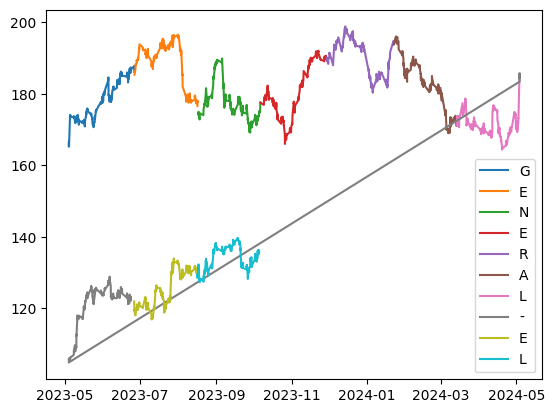

In [58]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [59]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-05-04 09:30:00-04:00,164.889999,165.770004,164.309998,165.250000,165.250000,16477924,APPLE
2023-05-04 10:30:00-04:00,165.255005,166.880005,165.130295,165.934998,165.934998,9036370,APPLE
2023-05-04 11:30:00-04:00,165.940002,166.229996,165.429993,166.210007,166.210007,5049232,APPLE
2023-05-04 12:30:00-04:00,166.210007,167.039993,165.949997,166.672607,166.672607,5244652,APPLE
2023-05-04 13:30:00-04:00,166.675003,166.904999,165.510101,165.532806,165.532806,5400963,APPLE
...,...,...,...,...,...,...,...
2024-05-03 11:30:00-04:00,184.660004,184.940002,184.130005,184.360001,184.360001,10376113,APPLE
2024-05-03 12:30:00-04:00,184.359894,185.494995,184.300003,185.360107,185.360107,12652093,APPLE
2024-05-03 13:30:00-04:00,185.360001,185.860001,184.809998,185.750000,185.750000,12223485,APPLE


In [60]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [61]:
    df_app_c

,Close
Datetime,
2023-05-04 09:30:00-04:00,165.250000
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607
2023-05-04 13:30:00-04:00,165.532806
...,...
2024-05-03 11:30:00-04:00,184.360001
2024-05-03 12:30:00-04:00,185.360107
2024-05-03 13:30:00-04:00,185.750000


In [62]:
    dfxfs

,Close
Datetime,
2023-05-04 09:30:00-04:00,165.250000
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607
2023-05-04 13:30:00-04:00,165.532806
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [63]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2023-05-04 09:30:00-04:00,165.250000
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607
2023-05-04 13:30:00-04:00,165.532806
...,...
2024-05-03 11:30:00-04:00,184.360001
2024-05-03 12:30:00-04:00,185.360107
2024-05-03 13:30:00-04:00,185.750000


In [64]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2023-05-04 09:30:00-04:00,165.250000
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607
2023-05-04 13:30:00-04:00,165.532806
...,...
2024-05-03 11:30:00-04:00,184.360001
2024-05-03 12:30:00-04:00,185.360107
2024-05-03 13:30:00-04:00,185.750000


In [65]:
    dfxfs

,Close
Datetime,
2023-05-04 09:30:00-04:00,165.250000
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607
2023-05-04 13:30:00-04:00,165.532806
...,...
2024-05-03 11:30:00-04:00,164.289993
2024-05-03 12:30:00-04:00,164.110001
2024-05-03 13:30:00-04:00,164.300003


In [66]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([165.25      , 165.93499756, 166.21000671, ..., 185.75      ,
       184.99499512, 183.38000488])

In [67]:
    fcv = np.array(dfxfs['Close'])

In [68]:
    len(fcv)

17560

In [69]:
    mseallfe = np.zeros(len(dfxfs))

In [70]:
    dfxfs[1:4]

,Close
Datetime,
2023-05-04 10:30:00-04:00,165.934998
2023-05-04 11:30:00-04:00,166.210007
2023-05-04 12:30:00-04:00,166.672607


In [71]:
    for i in range(0,len(dfxfs)):
        mseallfe[i] = fcv[i]-fxv[i]
        

In [72]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

17560

In [73]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

17560

In [74]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [75]:
    len(final_df)

17560

In [76]:
    len(mseallfe)

17560

In [77]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([165.25      , 165.93499756, 166.21000671, ..., 185.75      ,
       184.99499512, 183.38000488])

In [78]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,165.250000
1,165.934998
2,166.210007
3,166.672607
4,165.532806
...,...
17555,184.360001
17556,185.360107
17557,185.750000
17558,184.994995


In [79]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [80]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

13262

In [81]:
    datasetx

,Close
1746,172.899994
1747,173.149994
1748,173.089996
1749,183.957794
1750,184.649994
...,...
15700,175.410004
15701,175.100006
15702,174.520004
15703,173.130005


In [82]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[-0.98179709],
       [-0.98126407],
       [-0.98139199],
       ...,
       [-0.97834309],
       [-0.98130669],
       [-0.98173313]])

In [83]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([-0.98179709, -0.98126407, -0.98139199, -0.95822089, -0.95674506,
       -0.95736335, -0.95523103, -0.95439975, -0.95600948, -0.95945278,
       -0.99810755, -0.99664708, -0.99606073, -0.99507443, -0.99750458,
       -0.99720482, -0.99695624, -0.98080564, -0.9797978 , -0.98102954,
       -0.98021933, -0.97928121, -0.97999547, -0.98027262, -0.98081632,
       -0.98111354, -0.97999547, -0.98024064, -0.98030483, -0.98072038,
       -0.98046454, -0.98260726, -0.98311813, -0.98358996, -0.98327887,
       -0.98314028, -0.98379059, -0.98418502, -0.98147726, -0.98096535,
       -0.98120541, -0.983652  , -0.98239407, -0.98024064, -0.98040058,
       -0.98228746, -0.98009141, -0.98017668, -0.98058178, -0.97947289,
       -0.9792599 , -0.97985688, -0.98224481, -0.98269256, -0.98383321,
       -0.98419569, -0.98514445, -0.98392895, -0.98252199, -0.98405092])]
[-0.9831402836552854]

[array([-0.98179709, -0.98126407, -0.98139199, -0.95822089, -0.95674506,
       -0.95736335, -0.95523103, -0.9

In [84]:
    len(x_trainx)

13202

In [85]:
    sdx

,Close
0,165.250000
1,165.934998
2,166.210007
3,166.672607
4,165.532806
...,...
17555,184.360001
17556,185.360107
17557,185.750000
17558,184.994995


In [86]:
    x_trainx.shape[0]

13202

In [87]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [88]:
    xtrainfinal.shape[0]

17560

In [89]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [90]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [92]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

133/133 [==============================] - 0s 667us/step - loss: 0.5547


In [93]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [94]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
15008,279.488190
15009,279.249985
15010,276.765015
15011,277.215012
15012,276.330002
...,...
15700,175.410004
15701,175.100006
15702,174.520004
15703,173.130005


In [95]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [96]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

22/22 [==============================] - 0s 648us/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [97]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [98]:
    predictionsx

array([[633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.3862],
       [633.

In [99]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

17560

In [100]:
    data

0        165.250000
1        165.934998
2        166.210007
3        166.672607
4        165.532806
            ...    
17555    184.360001
17556    185.360107
17557    185.750000
17558    184.994995
17559    183.380005
Name: Close, Length: 17560, dtype: float64

In [101]:
    datax = pd.DataFrame(data)
    datax

,Close
0,165.250000
1,165.934998
2,166.210007
3,166.672607
4,165.532806
...,...
17555,184.360001
17556,185.360107
17557,185.750000
17558,184.994995


In [102]:
    datax

,Close
0,165.250000
1,165.934998
2,166.210007
3,166.672607
4,165.532806
...,...
17555,184.360001
17556,185.360107
17557,185.750000
17558,184.994995


In [103]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[165.25       165.93499756 166.21000671 166.67260742 165.5328064
 165.67340088 165.78999329 173.36500549 173.83770752 173.25999451
 173.63999939 174.08000183 173.74499512 173.61500549 173.36000061
 173.22059631 173.74499512 173.63000488 173.59989929 173.40499878
 173.5249939  172.52000427 172.28039551 172.05909729 172.20500183
 172.27000427 171.96499634 171.77999878 173.05000305 173.2901001
 173.17750549 172.02999878 172.61999512 173.63000488 173.55499268
 172.66999817 173.69999695 173.66000366 173.47000122 173.99009705
 174.08999634 173.80999756 172.69000244 172.47999573 171.94500732
 171.7749939  171.33000183 171.90010071 172.55999756 171.84289551
 172.27000427 172.17869568 171.84700012 171.81500244 171.81219482
 172.13000488 172.41000366 172.30999756 172.25       172.16110229
 171.8999939  172.66499329 172.08000183 171.021698   170.84669495
 171.13499451 172.03999329 172.40849304 172.3500061  172.6499939
 173.66999817 174.66000366 174.36000061 174.27999878 174.11000061
 174.5       

In [104]:
    valid = pd.DataFrame()

In [105]:
    valid

""


In [106]:
    np.array(data)

array([165.25      , 165.93499756, 166.21000671, ..., 185.75      ,
       184.99499512, 183.38000488])

In [107]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [108]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [109]:
    valid

,predictions,close app
0,180.394287,165.250000
1,181.010803,165.934998
2,181.258301,166.210007
3,181.674683,166.672607
4,180.648804,165.532806
...,...,...
692,187.229797,172.845001
693,186.739502,172.300201
694,186.235352,171.740005
695,186.379272,171.899994


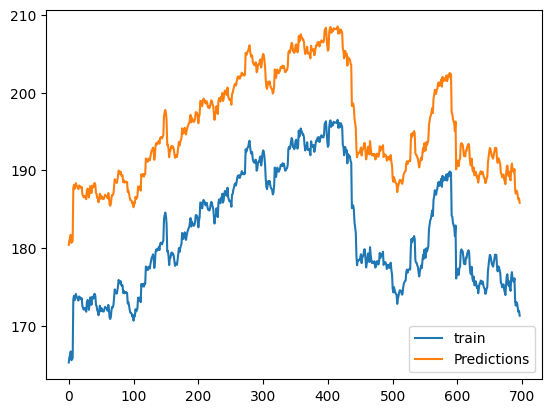

[[3.89156615 3.80253725 3.76620238 ... 2.94181604 2.91449708 3.02064279]
 [3.96998781 3.88275748 3.84718033 ... 3.04479847 3.01841172 3.1210253 ]
 [4.00103746 3.9144991  3.87921307 ... 3.08517346 3.05913499 3.16042663]
 ...
 [4.58097714 4.50559142 4.4749687  ... 3.80727541 3.78620624 3.86850711]
 [4.59665884 4.52153457 4.49102057 ... 3.8261295  3.80516472 3.88706421]
 [4.5345691  4.45839874 4.42744962 ... 3.75130796 3.72992265 3.81343843]]


In [110]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [114]:
error = np.mean(error_main, axis=1)
error

array([2.38715425, 2.41637141, 2.42717601, 2.4452465 , 2.39967238,
       2.4059903 , 2.41118071, 2.68883741, 2.71286189, 2.68373487,
       2.70309793, 2.72642943, 2.70784068, 2.70184377, 2.68859895,
       2.68178515, 2.70784068, 2.70260433, 2.70104016, 2.69078174,
       2.6970129 , 2.64732796, 2.63667306, 2.62593469, 2.63307228,
       2.63616131, 2.62101994, 2.61108513, 2.67301274, 2.68521596,
       2.67977442, 2.62455717, 2.65317918, 2.70260433, 2.69836763,
       2.65582063, 2.70594111, 2.70403229, 2.69412915, 2.72161034,
       2.72707079, 2.71127928, 2.65680889, 2.64548429, 2.61982018,
       2.61075609, 2.58775172, 2.61779613, 2.64955775, 2.61481669,
       2.63616131, 2.63166638, 2.61504441, 2.61323104, 2.61306761,
       2.62956995, 2.64200472, 2.63804374, 2.63511721, 2.63099451,
       2.61778955, 2.65556655, 2.62701536, 2.57814506, 2.57184362,
       2.58151329, 2.62504798, 2.64195149, 2.63972685, 2.65479326,
       2.70446289, 2.75856771, 2.74132508, 2.73758545, 2.72827

In [116]:
print(np.mean(error))

3.54564735219928


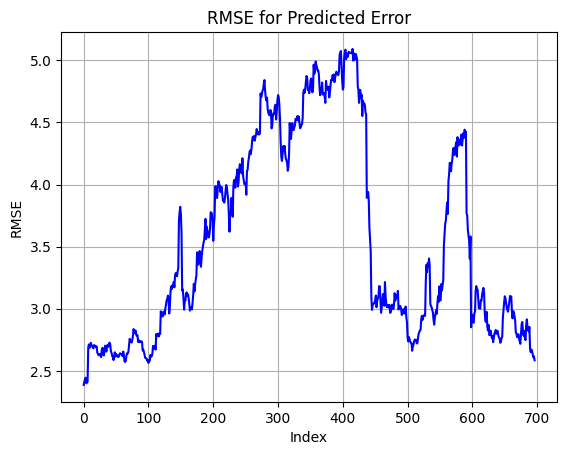

In [115]:
plt.plot(np.arange(697), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [113]:
final_pred

array([180.39428711, 181.01080322, 181.25830078, 181.67468262,
       180.64880371, 180.77539062, 180.88031006, 187.69781494,
       188.12322998, 187.60327148, 187.9453125 , 188.34130859,
       188.03979492, 187.92285156, 187.69329834, 187.56787109,
       188.03979492, 187.9362793 , 187.90924072, 187.73382568,
       187.84179688, 186.93731689, 186.72167969, 186.52246094,
       186.65380859, 186.71228027, 186.43780518, 186.27130127,
       187.41430664, 187.63037109, 187.52905273, 186.49633789,
       187.02734375, 187.9362793 , 187.86877441, 187.07232666,
       187.99932861, 187.96331787, 187.79229736, 188.26037598,
       188.3503418 , 188.09832764, 187.09033203, 186.90130615,
       186.4197998 , 186.26678467, 185.86633301, 186.37939453,
       186.97332764, 186.32788086, 186.71228027, 186.63012695,
       186.331604  , 186.30279541, 186.30029297, 186.58630371,
       186.83831787, 186.74829102, 186.69433594, 186.61431885,
       186.37927246, 187.06781006, 186.5413208 , 185.58